### Payoffs e funzioni profitto perdita con call e put
Yan Python for Finance second edition (2017) pag. 341

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas as pd
import datetime as dt

Convenzione X prezzo di esercizio (strike) S prezzo dell'azione alla scadenza dell'opzione)

$ 𝑝𝑎𝑦𝑜𝑓𝑓(𝑐𝑎𝑙𝑙)=𝑀𝑎𝑥(𝑆−X,0) $

$ 𝑝𝑎𝑦𝑜𝑓𝑓(𝑝𝑢𝑡)=𝑀𝑎𝑥(X−𝑆,0) $

In [ ]:
def payoff_call(sT,x):
    return max(0, sT - x)
    #return (sT - x +abs(sT - x))/2

In [ ]:
payoff_call(20,30)

0

In [ ]:
payoff_call(30,20)

10

Grafico dei payoff

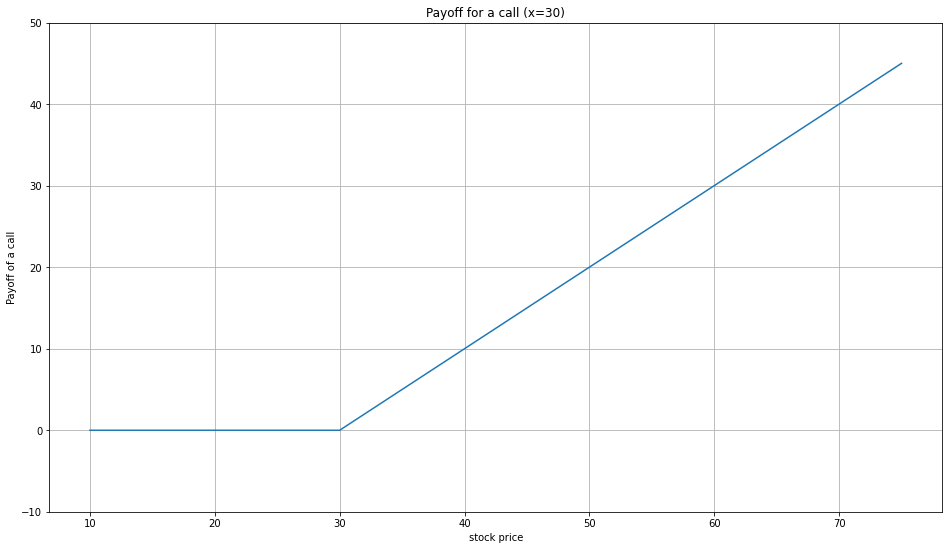

In [ ]:

s = np.arange(10,80,5)
x=30
payoff=(abs(s-x)+s-x)/2
plt.figure(figsize=(16,9))
plt.ylim(-10,50)
plt.plot(s,payoff)
plt.title("Payoff for a call (x=30)")
plt.xlabel("stock price")
plt.ylabel("Payoff of a call")
plt.grid(True)
plt.show()

Profitti e perdite da acquisto o vendita di un'opzione  call

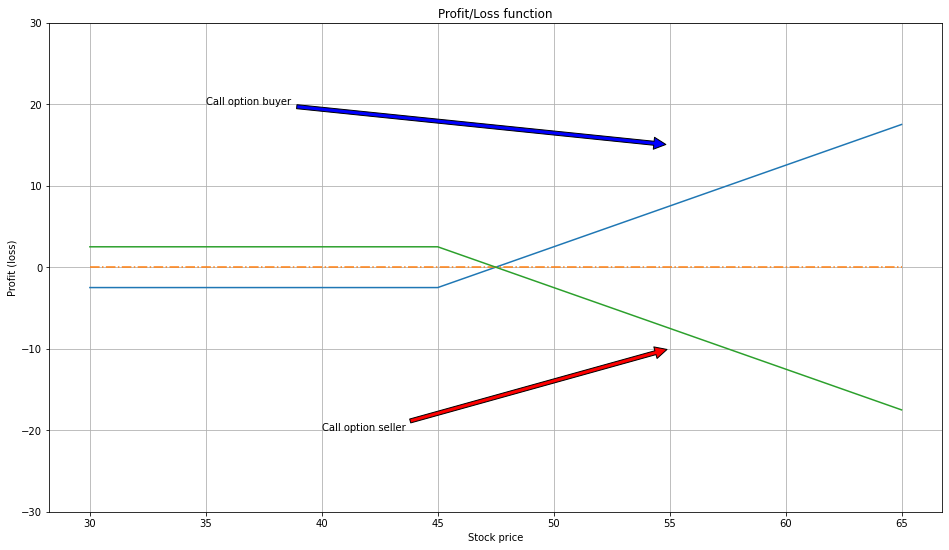

In [ ]:



s = np.arange(30,70,5)
x=45;c=2.5
y=(abs(s-x)+s-x)/2 -c
y2=np.zeros(len(s))
plt.figure(figsize = (16,9))
plt.ylim(-30,30)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.plot(s,-y)
plt.title("Profit/Loss function")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Call option buyer', xy=(55,15), xytext=(35,20),
             arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Call option seller', xy=(55,-10), xytext=(40,-20),
             arrowprops=dict(facecolor='red',shrink=0.01),)
plt.grid(True)
plt.show()

Profitti e perdite da acquisto o vendita di un'opzione put

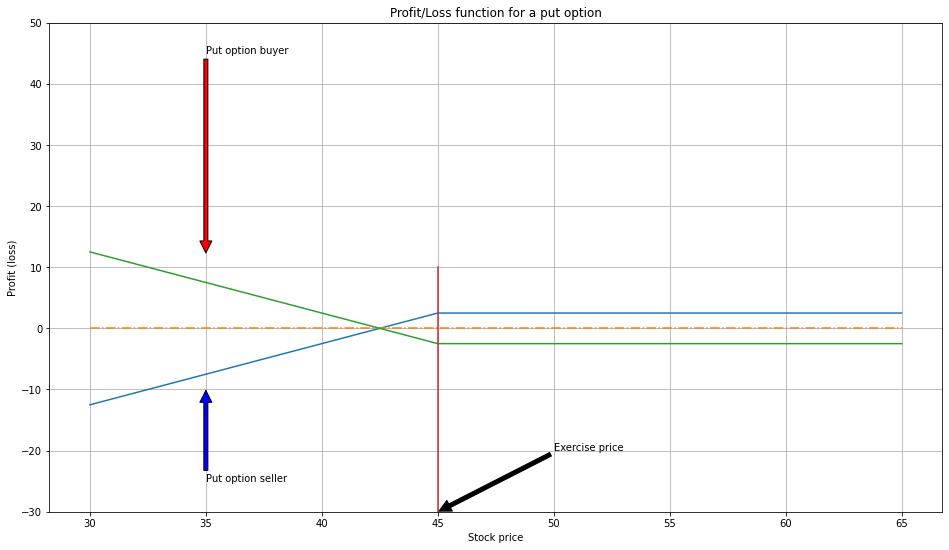

In [ ]:


s = np.arange(30,70,5)
x=45;p=2;c=2.5
y=c-(abs(x-s)+x-s)/2 
y2=np.zeros(len(s))
plt.figure(figsize = (16,9))
x3=[x, x]
y3=[-30,10]
plt.ylim(-30,50)
plt.plot(s,y) 
plt.plot(s,y2,'-.') 
plt.plot(s,-y) 
plt.plot(x3,y3)
plt.title("Profit/Loss function for a put option") 
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Put option buyer', xy=(35,12), xytext=(35,45), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Put option seller', xy=(35,-10), xytext=(35,-25), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Exercise price', xy=(45,-30), xytext=(50,-20), arrowprops=dict(facecolor='black',shrink=0.01),)
plt.grid(True)
plt.show()

### Formula di Black-Scholes-Merton

$$f_{c}=S_{0}\ N(d_1)-Ke^{-rT}\ N(d_2),$$
$$f_p = Ke^{-rT}\ N (-d_2)-S_0\ N(-d_1),$$
 
where,
 
$$ d_1 = \frac{log(S_0/K)+(r+\sigma^2/2)T}{\sigma\sqrt(T)}$$
$$ d_2 = \frac{log(S_0/K)+(r-\sigma^2/2)T}{\sigma\sqrt(T)}=d_1-\sigma\sqrt{T}$$
 


In [ ]:
from scipy import log,exp,sqrt,stats 
def bs_call(S,X,T,r,sigma):
    d1=(np.log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T)) 
    d2 = d1-sigma*np.sqrt(T)
    return S*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2)
    

Altra formula 


https://www.youtube.com/watch?v=FzeXWMlTDHY&t=353s

In [ ]:
def blackScholes(r, S, K, T, sigma, type = "C"):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "C":
            price =  S * norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0 ,1)
        elif type == "P":
            price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
        return price
    
    except:
        print("Please confirm all option parameters above")


In [ ]:
c = bs_call(100., 105., 0.5, 0.015, 0.20)
round(c, 3)

3.891

### Strategie con opzioni
#### Lungo azione  corto opzione call

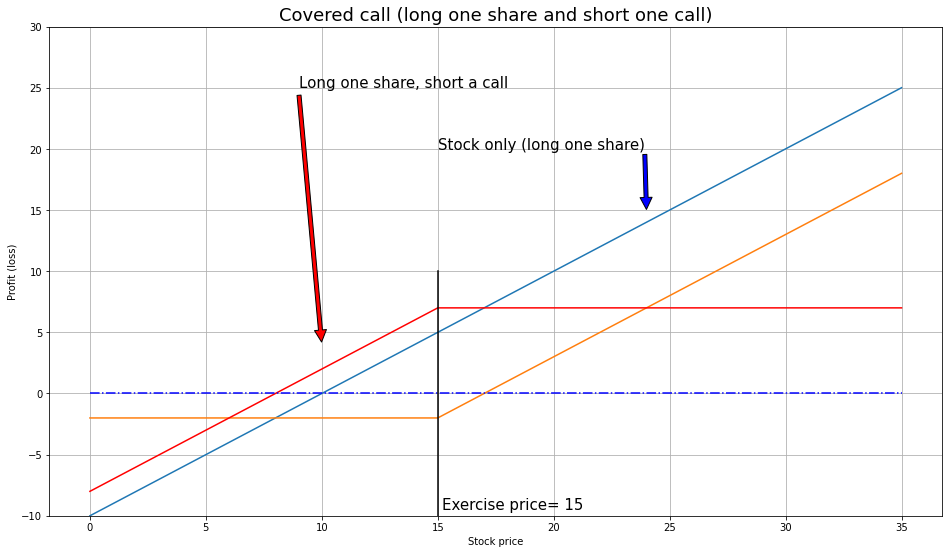

In [ ]:

sT = np.arange(0,40,5) 
k=15;s0=10;c=2
y0=np.zeros(len(sT))
y1=sT-s0                    # stock only
y2=(abs(sT-k)+sT-k)/2-c     # long a call 
y3=y1-y2                    # covered-call 
plt.figure(figsize=(16,9))
plt.ylim(-10,30)
plt.plot(sT,y1) 
plt.plot(sT,y2) 
plt.plot(sT,y3,'red')
plt.plot(sT,y0,'b-.') 
plt.plot([k,k],[-10,10],'black')
plt.title('Covered call (long one share and short one call)', fontsize = 18) 
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Stock only (long one share)', xy=(24,15),xytext=(15,20), arrowprops=dict(facecolor='blue',shrink=0.01), fontsize = 15)
plt.annotate('Long one share, short a call', xy=(10,4), xytext=(9,25), arrowprops=dict(facecolor='red',shrink=0.01),fontsize = 15)
plt.annotate('Exercise price= '+str(k), xy=(k+0.2,-10+0.5), fontsize = 15)
plt.grid(True)
plt.show()


#### Long Straddle - Comprare una call e una put con lo stesso prezzo di esercizio

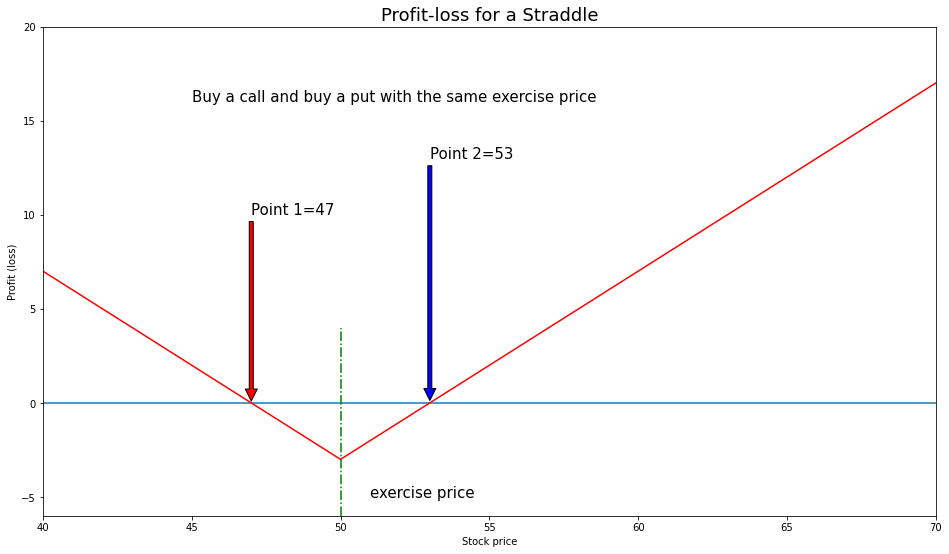

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
sT = np.arange(30,80,5)
x=50;	c=2; p=1
straddle=(abs(sT-x)+sT-x)/2-c + (abs(x-sT)+x-sT)/2-p 
y0=np.zeros(len(sT))
plt.figure(figsize = (16,9))
plt.ylim(-6,20) 
plt.xlim(40,70) 
plt.plot(sT,y0) 
plt.plot(sT,straddle,'r')
plt.plot([x,x],[-6,4],'g-.')
plt.title("Profit-loss for a Straddle", fontsize = 18) 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)')
plt.annotate('Point 1='+str(x-c-p), xy=(x-p-c,0), xytext=(x-p-c,10),
arrowprops=dict(facecolor='red',shrink=0.01),fontsize = 15) 
plt.annotate('Point 2='+str(x+c+p), xy=(x+p+c,0), xytext=(x+p+c,13),
arrowprops=dict(facecolor='blue',shrink=0.01),fontsize = 15) 
plt.annotate('exercise price', xy=(x+1,-5),fontsize = 15)
plt.annotate('Buy a call and buy a put with the same exercise price',xy=(45,16), fontsize = 15)
plt.show()

#### Calcolo del delta di un'opzione

Delta : cambiamento del prezzo di un'opzione al variare del prezzo dell'azione sottostante


Formula chiusa

In [ ]:
def delta1(S,X,T,r,sigma):
    d1 = (np.log(S/X) + (r + sigma*sigma/2.)* T)/ (sigma*np.sqrt(T))
    return stats.norm.cdf(d1)

In [ ]:
delta1(40,40,1,0.015,0.2)

0.5694601832076737

Calcolo diretto

In [ ]:
def delta2(S,X,T,r,sigma):
    s1 = S
    s2 = S + 1e-9
    c1 = bs_call(s1, X, T, r, sigma)
    c2 = bs_call(s2, X, T, r, sigma)
    delta = (c2 - c1) / (s2 - s1)
    return delta

In [ ]:
delta2(40,40,1,0.015,0.2)

0.5694628988823124

### Put call parity

Il prezzo della call più il valore attuale del prezzo di esercizio è uguale al prezzo della put più il valore corrente dell'azione

$$ C + Xe^{-rT} = P + S $$


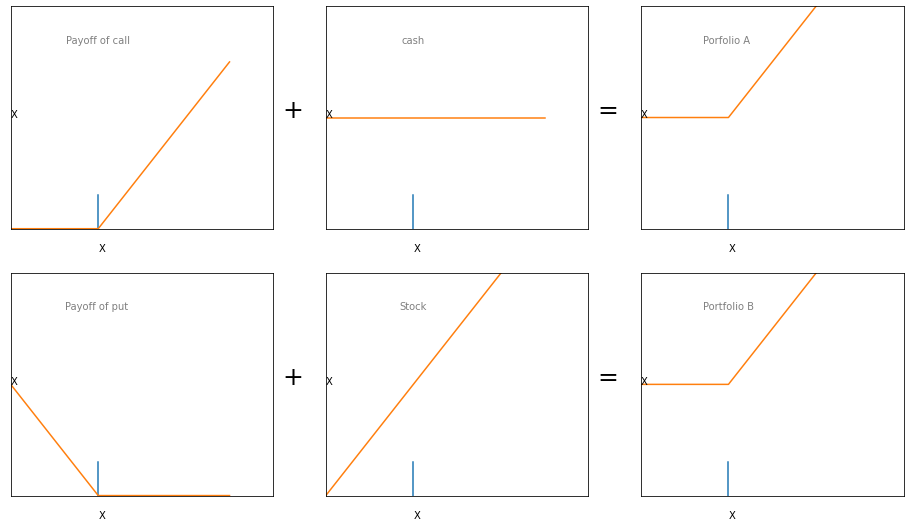

In [ ]:
import pylab as pl 
import numpy as np 
x=10
sT=np.arange(0,30,5) 
payoff_call=(abs(sT-x)+sT-x)/2 
payoff_put=(abs(x-sT)+x-sT)/2 
cash=np.zeros(len(sT))+x

def graph(text,text2=''): 
    pl.xticks(())
    pl.yticks(())
    pl.xlim(0,30)
    pl.ylim(0,20) 
    pl.plot([x,x],[0,3])
    pl.text(x,-2,"X");
    pl.text(0,x,"X")
    pl.text(x,x*1.7, text, ha='center', va='center',size=10, alpha=.5) 
    pl.text(-5,10,text2,size=25)
    
pl.figure(figsize=(16, 9))
pl.subplot(2, 3, 1); graph('Payoff of call');	   pl.plot(sT,payoff_call) 
pl.subplot(2, 3, 2); graph('cash','+');	         pl.plot(sT,cash)
pl.subplot(2, 3, 3); graph('Porfolio A ','=');   pl.plot(sT,cash+payoff_call)
pl.subplot(2, 3, 4); graph('Payoff of put ');	   pl.plot(sT,payoff_put) 
pl.subplot(2, 3, 5); graph('Stock','+');	   pl.plot(sT,sT)
pl.subplot(2, 3, 6); graph('Portfolio B','=');   pl.plot(sT,sT+payoff_put) 
pl.show()


Parametri iniziali

In [ ]:
r = 0.01
S = 35
K = 40
T = 1
sigma = 0.30

Funzione Black Scholes

In [ ]:
def blackScholes(r, S, K, T, sigma, type = "C"):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "C":
            price =  S * norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0 ,1)
        elif type == "P":
            price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
        return price
    
    except:
        print("Please confirm all option parameters above")


In [ ]:
# prova
P = blackScholes(r, S, K, T, sigma, type = "C")
P

2.515055958704906

### Simulazioni con opzione call

#### Variazione del prezzo dell'opzione al variare del prezzo dell'azione sottostante
Durata (T) = 1 anno
Tasso d'interesse (r) = 1%
Prezzo di esercizio (K) = 40
volatilità (sigma) = 0.30
Prezzo di mercato (S) da 1 a 40

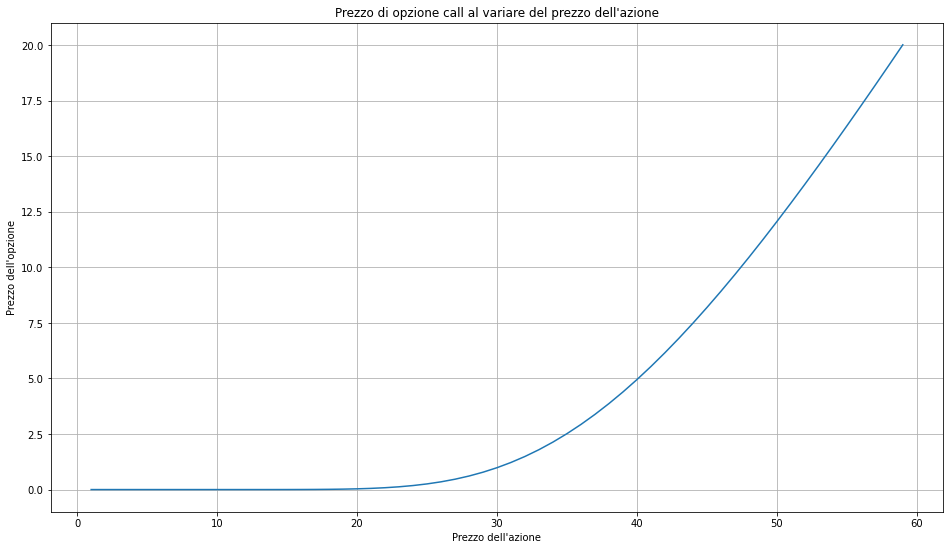

In [ ]:
stock_price = []
opt_price = []


r = 0.01
#S = 40
K = 40
T = 1
sigma = 0.30

for S in range(1,60):
    P = blackScholes(r, S, K, T, sigma, type = "C")
    stock_price.append(S)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(stock_price, opt_price)

plt.xlabel("Prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del prezzo dell'azione");


#### Variazione del prezzo dell'opzione al variare della volatilità
Durata (T) = 1 anno Tasso d'interesse (r) = 1% - Prezzo di esercizio (K) = 40 Prezzo di mercato (S) = 30 Volatilità (sigma) da 5% a 50%

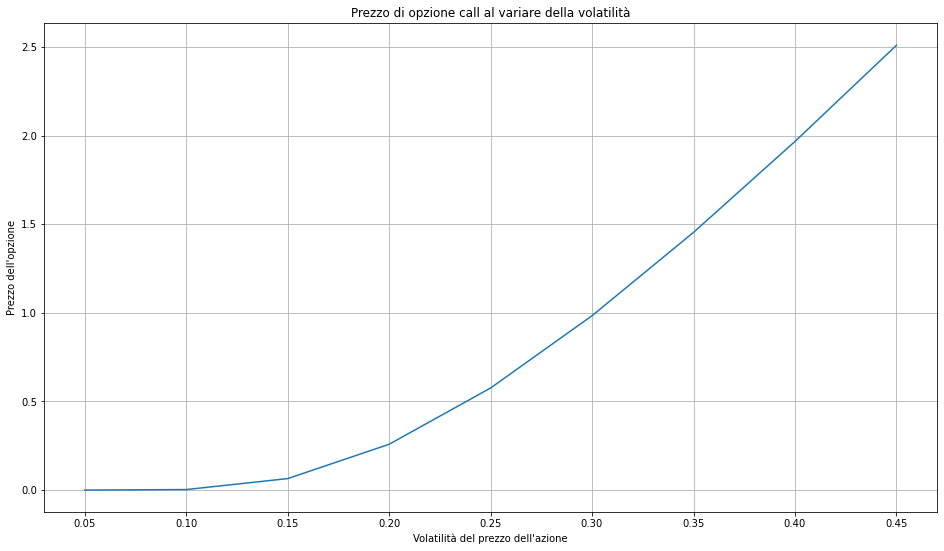

In [ ]:
vola = []
opt_price = []


r = 0.01
S = 30
K = 40
T = 1
# sigma = 0.30

for sigma in range(5, 50, 5):
    sigma  = sigma/100
    P = blackScholes(r, S, K, T, sigma, type = "C")
    vola.append(sigma)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(vola, opt_price)
plt.xlabel("Volatilità del prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare della volatilità");


#### Variazione del prezzo dell'opzione al variare del tasso d'interesse
Durata (T) = 1 anno Tasso d'interesse (r) da 1% a 10% - Prezzo di esercizio (K) = 40 volatilità (sigma) = 0.30 Prezzo di mercato (S) = 30

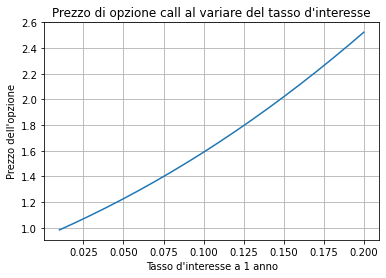

In [ ]:
tasso = []
opt_price = []


#r = 0.01
S = 30
K = 40
T = 1
sigma = 0.30

for r in range(1,21):
    r = r/100
    P = blackScholes(r, S, K, T, sigma, type = "C")
    tasso.append(r)
    opt_price.append(P)

plt.plot(tasso, opt_price)
plt.xlabel("Tasso d'interesse a 1 anno")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del tasso d'interesse");


### Simulazioni con opzione put

### Variazione del prezzo dell'opzione al variare del prezzo dell'azione sottostante
Durata (T) = 1 anno Tasso d'interesse (r) = 1% Prezzo di esercizio (K) = 40 volatilità (sigma) = 0.30 Prezzo di mercato (S) da 1 a 40

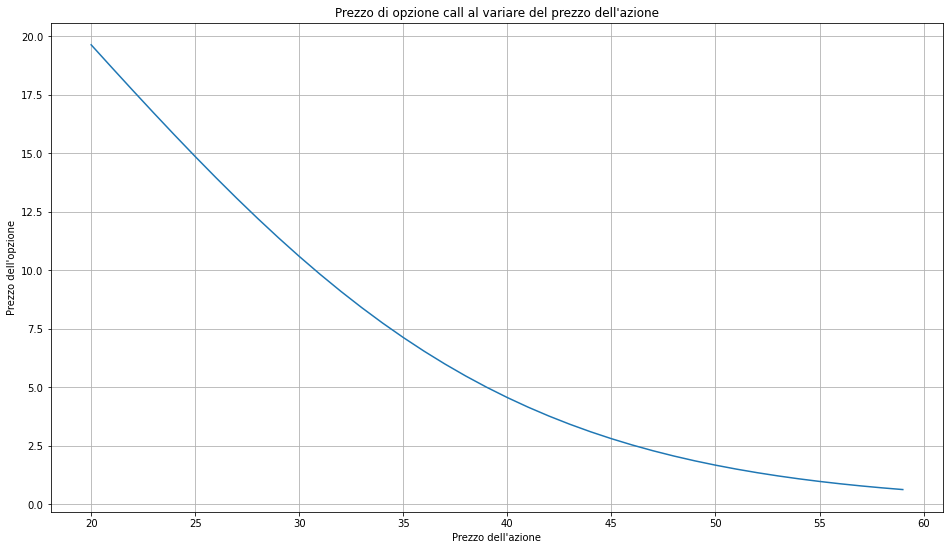

In [ ]:
stock_price = []
opt_price = []


r = 0.01
#S = 40
K = 40
T = 1
sigma = 0.30

for S in range(20,60):
    P = blackScholes(r, S, K, T, sigma, type = "P")
    stock_price.append(S)
    opt_price.append(P)
plt.figure(figsize=(16,9))
plt.plot(stock_price, opt_price)
plt.xlabel("Prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del prezzo dell'azione");


#### Variazione del prezzo dell'opzione al variare della volatilità
Durata (T) = 1 anno Tasso d'interesse (r) = 1% - Prezzo di esercizio (K) = 40 Prezzo di mercato (S) = 30 Volatilità (sigma) da 5% a 50%

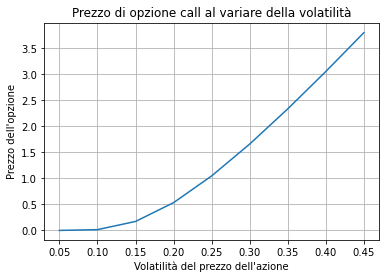

In [ ]:
vola = []
opt_price = []


r = 0.01
S = 50
K = 40
T = 1
# sigma = 0.30

for sigma in range(5, 50, 5):
    sigma  = sigma/100
    P = blackScholes(r, S, K, T, sigma, type = "P")
    vola.append(sigma)
    opt_price.append(P)

plt.plot(vola, opt_price)
plt.xlabel("Volatilità del prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare della volatilità");


#### Variazione del prezzo dell'opzione al variare del tasso d'interesse
Durata (T) = 1 anno Tasso d'interesse (r) da 1% a 10% - Prezzo di esercizio (K) = 40 volatilità (sigma) = 0.30 Prezzo di mercato (S) = 30

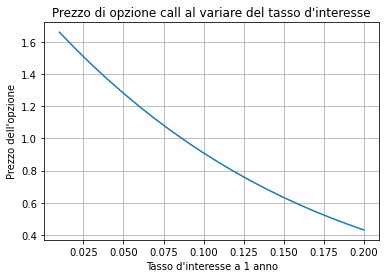

In [ ]:
tasso = []
opt_price = []


#r = 0.01
S = 50
K = 40
T = 1
sigma = 0.30

for r in range(1,21):
    r = r/100
    P = blackScholes(r, S, K, T, sigma, type = "P")
    tasso.append(r)
    opt_price.append(P)

plt.plot(tasso, opt_price)
plt.xlabel("Tasso d'interesse a 1 anno")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del tasso d'interesse");


### Prezzo di opzione europea tramite simulazione Monte Carlo - 2 righe di codice
https://www.youtube.com/watch?v=LqZ3A86LjD0&t=33s

anche Hilpisch (2019) pag. 375

In [ ]:
from numpy import *

In [ ]:
k = random.randn(252);

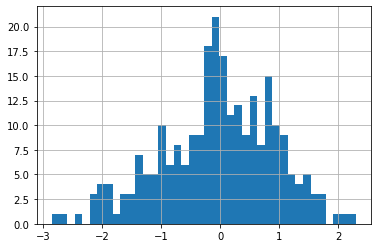

In [ ]:
plt.hist(k,40)
plt.grid(True)
plt.show()

In [ ]:
#applichiamo i numeri casuali alla volatilità
k = random.randn(100000)*0.30/sqrt(252)

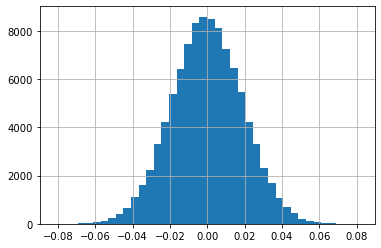

In [ ]:
plt.hist(k,40)
plt.grid(True)
plt.show()

Creaimo un "Moto Geometrico Browniano" (GBM) per descrivere il prezzo dell'azione nel tempo

Due proprietà:
- le vaziazioni dei prezzi sono propozionali al livello dei prezzi
- i prezzi non vanno mai sotto zero

Calcoliamo il prezzo di un'opzione call europea con prezzo di esercizio 40, prezzo attuale 30, volatilità 30% e tasso d'interesse 1%

In [ ]:

k = cumprod(1 + random.randn(1000)*0.30/sqrt(252))

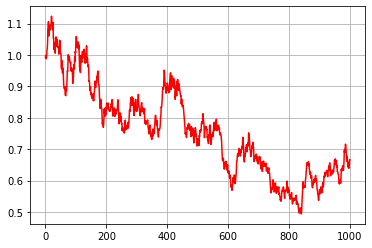

In [ ]:
plt.plot(k, 'r')
plt.grid(True)

In [ ]:
# Creriamo 1000 percorsi della durata di un anno
k = cumprod(1 + random.randn(1000, 252)*0.30/sqrt(252),1)

In [ ]:
k.shape

(1000, 252)

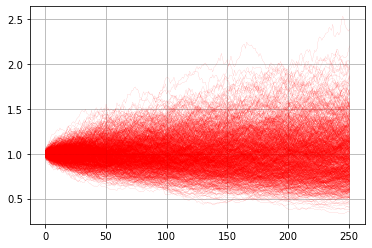

In [ ]:
for i in k:
    plt.plot(i, 'r', linewidth = '0.07')
    plt.grid(True);

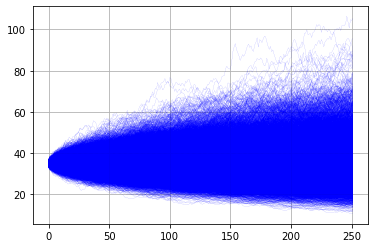

In [ ]:
# Applichiamo il GBM a un prezzo iniziale 
k = cumprod(1 + random.randn(10000, 252)*0.30/sqrt(252),1) * 35
for i in k:
    plt.plot(i, 'b', linewidth = '0.07')
    plt.grid(True);

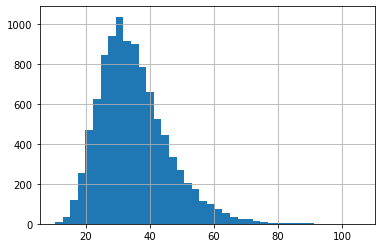

In [ ]:
# Per calcolare il prezzo di un'opzione put o call europea basta l'ultimo prezzo di ogni percorso
plt.hist(k[:,-1],40)
plt.grid(True);
# la distribuzione dei prezzi finali non è normale

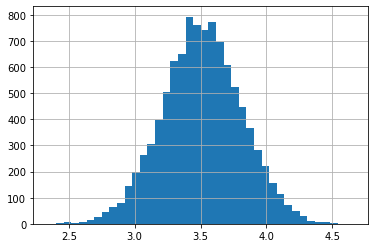

In [ ]:
plt.hist(np.log(k[:,-1]),40)
plt.grid(True);
# la distribuzione dei logaritmi dei prezzi finali lo è

In [ ]:
np.exp(-r*1) * mean((k[:,-1] - 40) * ((k[:,-1]-40)>0))

1.97851249134746

### Implied volatility

In [ ]:
#from scipy import log,exp,sqrt,stats

def implied_vol_call(S,X,T,r,c):
    for i in range(2000):
        sigma=0.005*(i+1)
        d1=(np.log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        diff=c-(S*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2))
        if abs(diff)<=0.01:
            return i,sigma, diff


In [ ]:
implied_vol_call(40, 40, 0.5, 0.05, 3.3)


(49, 0.25, -0.004006079737288282)

### Indice VIX

In [ ]:
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
df = web.get_data_yahoo(['^VIX','^GSPC'], '1/1/2007', dt.date.today())

In [ ]:
df.head()

Attributes Adj Close               Close                High               \
Symbols         ^VIX        ^GSPC   ^VIX        ^GSPC   ^VIX        ^GSPC   
Date                                                                        
2007-01-03     12.04  1416.599976  12.04  1416.599976  12.75  1429.420044   
2007-01-04     11.51  1418.339966  11.51  1418.339966  12.42  1421.839966   
2007-01-05     12.14  1409.709961  12.14  1409.709961  12.25  1418.339966   
2007-01-08     12.00  1412.839966  12.00  1412.839966  12.83  1414.979980   
2007-01-09     11.91  1412.109985  11.91  1412.109985  12.47  1415.609985   

Attributes    Low                Open              Volume              
Symbols      ^VIX        ^GSPC   ^VIX        ^GSPC   ^VIX       ^GSPC  
Date                                                                   
2007-01-03  11.53  1407.859985  12.16  1418.030029      0  3429160000  
2007-01-04  11.28  1408.430054  12.40  1416.599976      0  3004460000  
2007-01-05  11.68  1405.750000  11.84  1418.339966      0  2919400000  
2007-01-08  11.78  1403.969971  12.48  1409.260010      0  2763340000  
2007-01-09  11.69  1405.420044  11.86  1412.839966      0  3038380000

In [ ]:
df = df['Adj Close']
df.head()

Symbols,^VIX,^GSPC
Date,,
2007-01-03,12.04,1416.599976
2007-01-04,11.51,1418.339966
2007-01-05,12.14,1409.709961
2007-01-08,12.00,1412.839966
2007-01-09,11.91,1412.109985


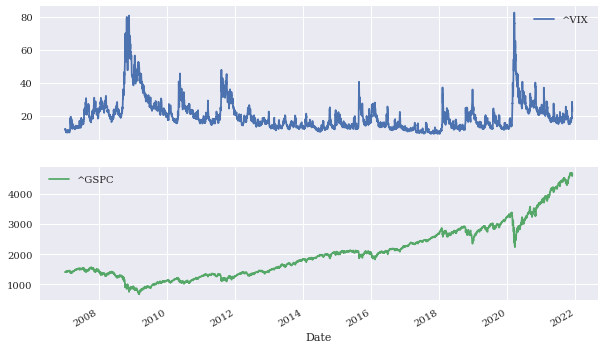

In [ ]:
df.plot(subplots=True, figsize=(10,6), grid = True);

#### Correlazione fra rendimenti del S&P 500 e del VIX

Hilpisch (2019) Python for Finance, pagg. 222 - 228

Visualizziamo la tendenza di VIX e S&P500 a muoversi in direzioni opposte

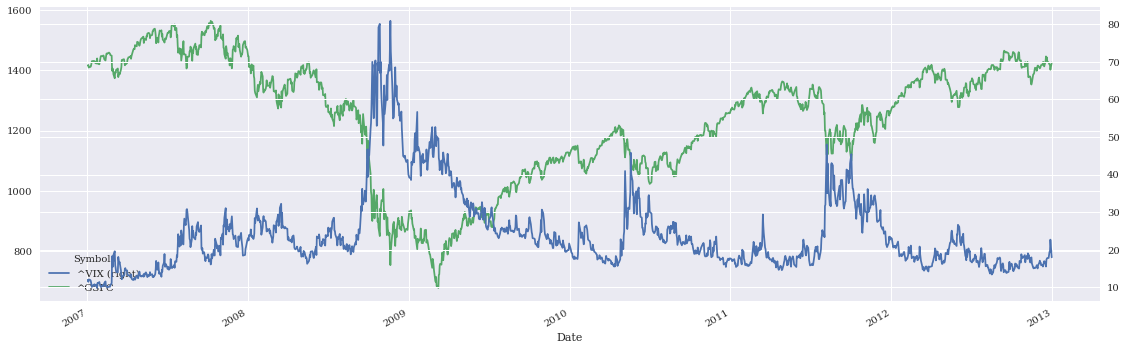

In [ ]:
df.loc[:'2012-12-31'].plot(secondary_y='^VIX', figsize=(19,6), grid = True);

Lavoriamo sui rendimenti anziché sui livelli

In [ ]:
rets = np.log(df / df.shift(1))


In [ ]:
rets.rename(columns={'^VIX': 'VIX', 
                           '^GSPC': 'SPX'}, inplace=True)

In [ ]:
rets.dropna(inplace = True)
rets.head()

Symbols,VIX,SPX
Date,,
2007-01-04,-0.045018,0.001228
2007-01-05,0.053290,-0.006103
2007-01-08,-0.011599,0.002218
2007-01-09,-0.007528,-0.000517
2007-01-10,-0.037643,0.001938


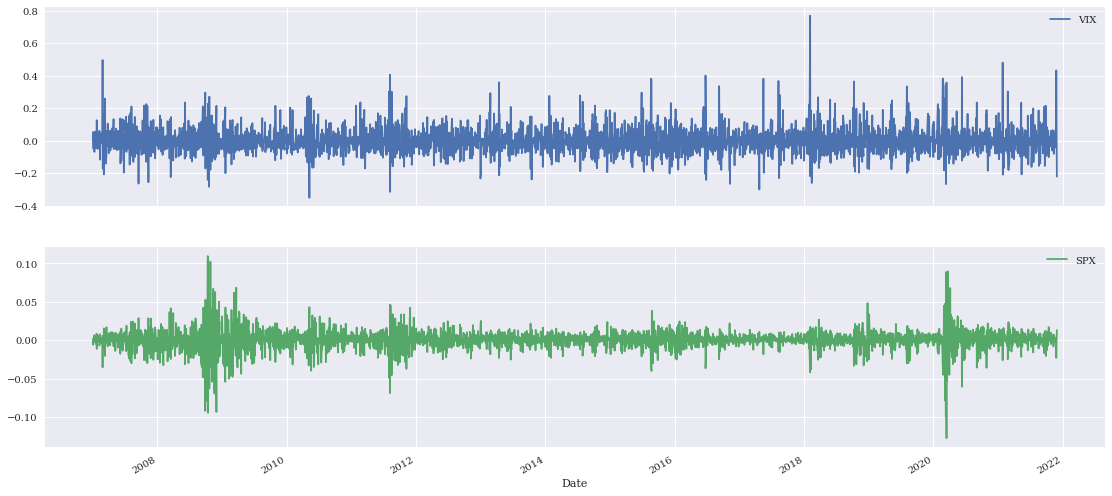

In [ ]:
rets.plot(subplots=True, grid = True, figsize=(19,9));

Evidenziamo la correlazione negativa fra rendimenti del S&P500 e variazioni del VIX

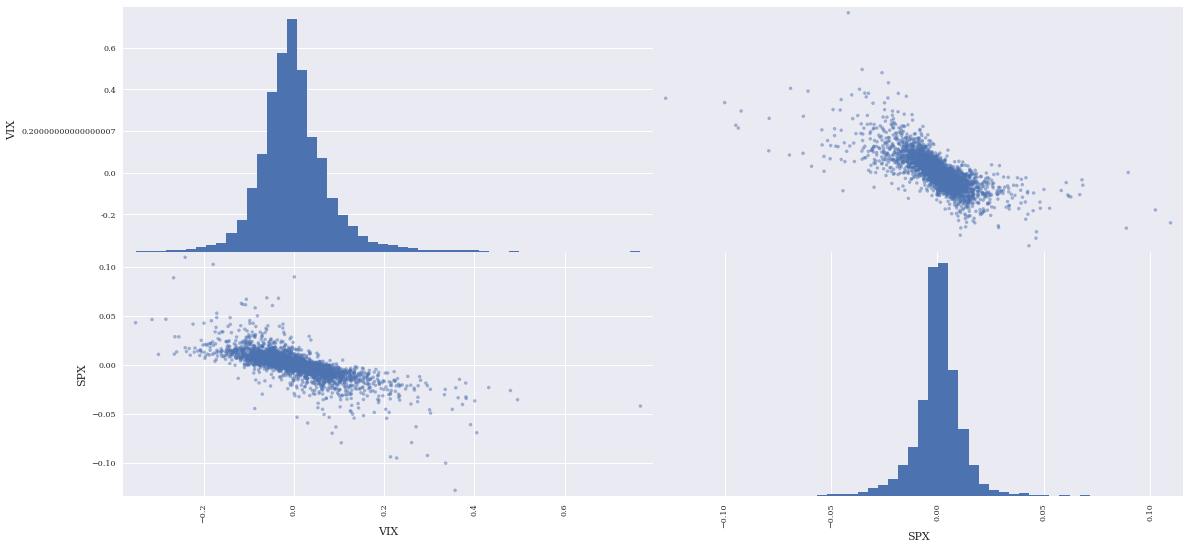

In [ ]:
pd.plotting.scatter_matrix(rets, alpha=0.5,
           diagonal = 'hist',
                  hist_kwds={'bins': 50},
                  figsize = (19,9), grid = True);

Stimiamo la relazione lineare fra i due

In [ ]:
reg = np.polyfit(rets['SPX'], rets['VIX'], deg=1)

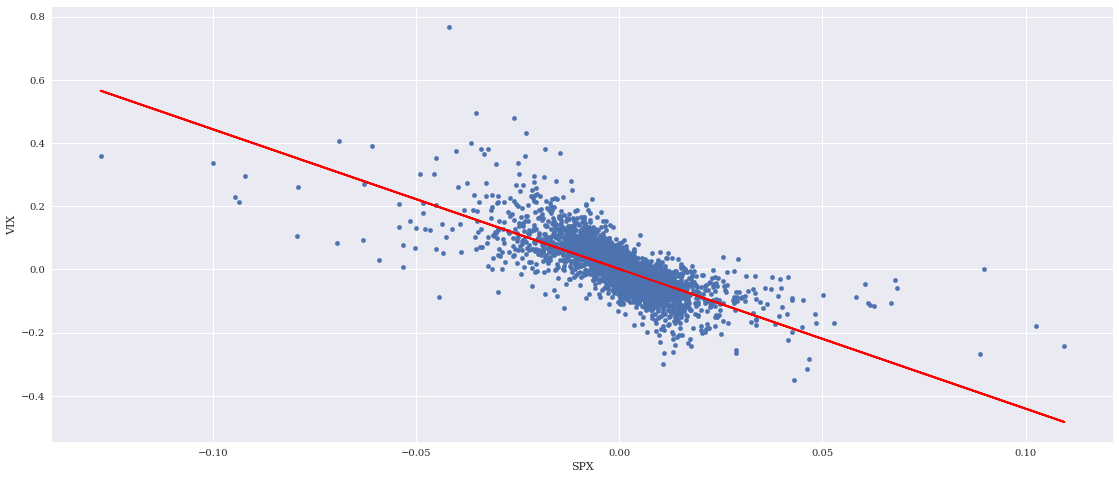

In [ ]:
ax = rets.plot(kind = 'scatter', x = 'SPX', y= 'VIX', figsize=(19,8))
ax.plot(rets['SPX'], np.polyval(reg, rets['SPX']), 'r', lw=2);

Evoluzione nel tempo della correlazione

In [ ]:
rets.corr()

Symbols,VIX,SPX
Symbols,,
VIX,1.000000,-0.728424
SPX,-0.728424,1.000000


In [ ]:
rets.cov()

Symbols,VIX,SPX
Symbols,,
VIX,0.006104,-0.000733
SPX,-0.000733,0.000166


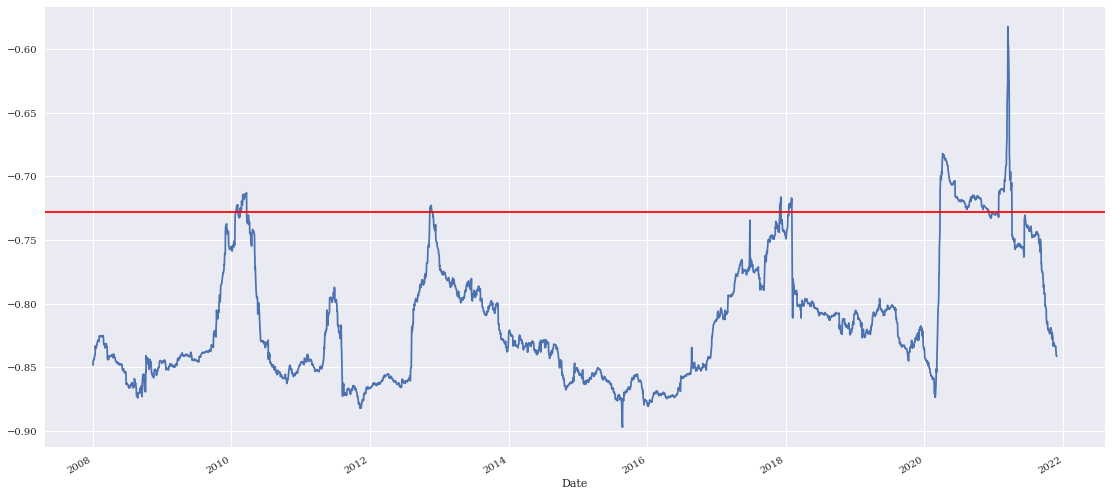

In [ ]:
ax = rets['SPX'].rolling(window=252).corr(rets['VIX']).plot(figsize=(19,9))
ax.axhline(rets.corr().iloc[0,1], c='r')